<a href="https://colab.research.google.com/github/zrosen3/Colombian-peso-counterfeit-detection/blob/main/Code/log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 42305, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 42305 (delta 89), reused 39 (delta 26), pack-reused 42174
Receiving objects: 100% (42305/42305), 884.43 MiB | 26.23 MiB/s, done.
Resolving deltas: 100% (1248/1248), done.
Updating files: 100% (103997/103997), done.
/content/Colombian-peso-counterfeit-detection/Code


In [2]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf


#Load in data

In [3]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


## Run logistic regression model

In [4]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(
                units = 13,
               activation = "softmax"
        )])
        
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5)

Epoch 1/5
2080/2080 [==============================] - 155s 72ms/step - loss: 84.3019 - accuracy: 0.4514 - val_loss: 126.3001 - val_accuracy: 0.4754
Epoch 2/5
2080/2080 [==============================] - 129s 62ms/step - loss: 61.5972 - accuracy: 0.6218 - val_loss: 38.4869 - val_accuracy: 0.6994
Epoch 3/5
2080/2080 [==============================] - 146s 70ms/step - loss: 50.5127 - accuracy: 0.6934 - val_loss: 23.2015 - val_accuracy: 0.7977
Epoch 4/5
2080/2080 [==============================] - 113s 54ms/step - loss: 49.0225 - accuracy: 0.7218 - val_loss: 33.2096 - val_accuracy: 0.7576
Epoch 5/5
2080/2080 [==============================] - 144s 69ms/step - loss: 45.0917 - accuracy: 0.7564 - val_loss: 41.4619 - val_accuracy: 0.7587


## Inspect model performance

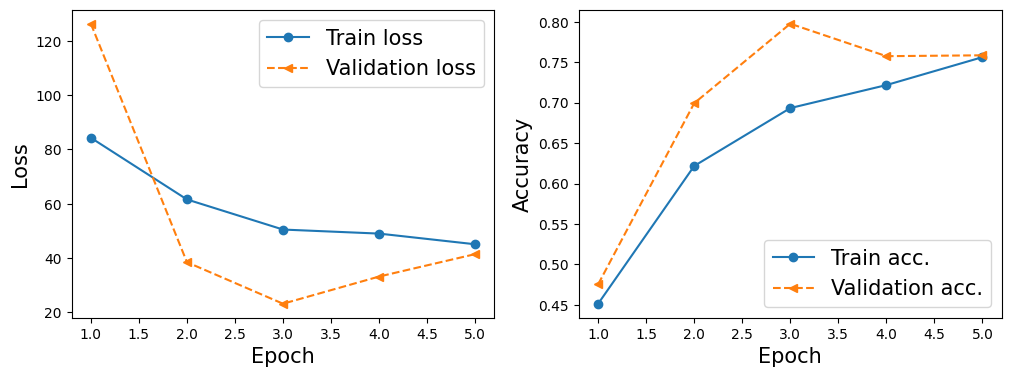

694/694 - 28s - loss: 41.1995 - accuracy: 0.7644 - 28s/epoch - 40ms/step
Test loss: 41.199462890625 | Test accuracy: 0.7644230723381042


(0.7563506960868835, 0.7586538195610046, 0.7644230723381042)

In [5]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 0.7644230769230768
Macro averaged recall score: 0.7976577019872827
Macro averaged F1 score: 0.7635303243697724


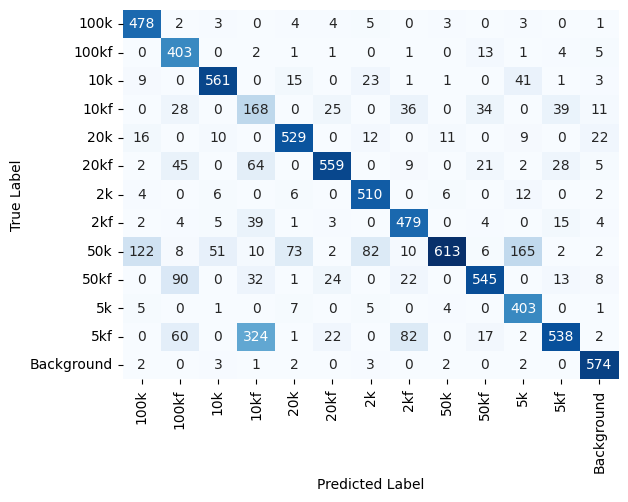

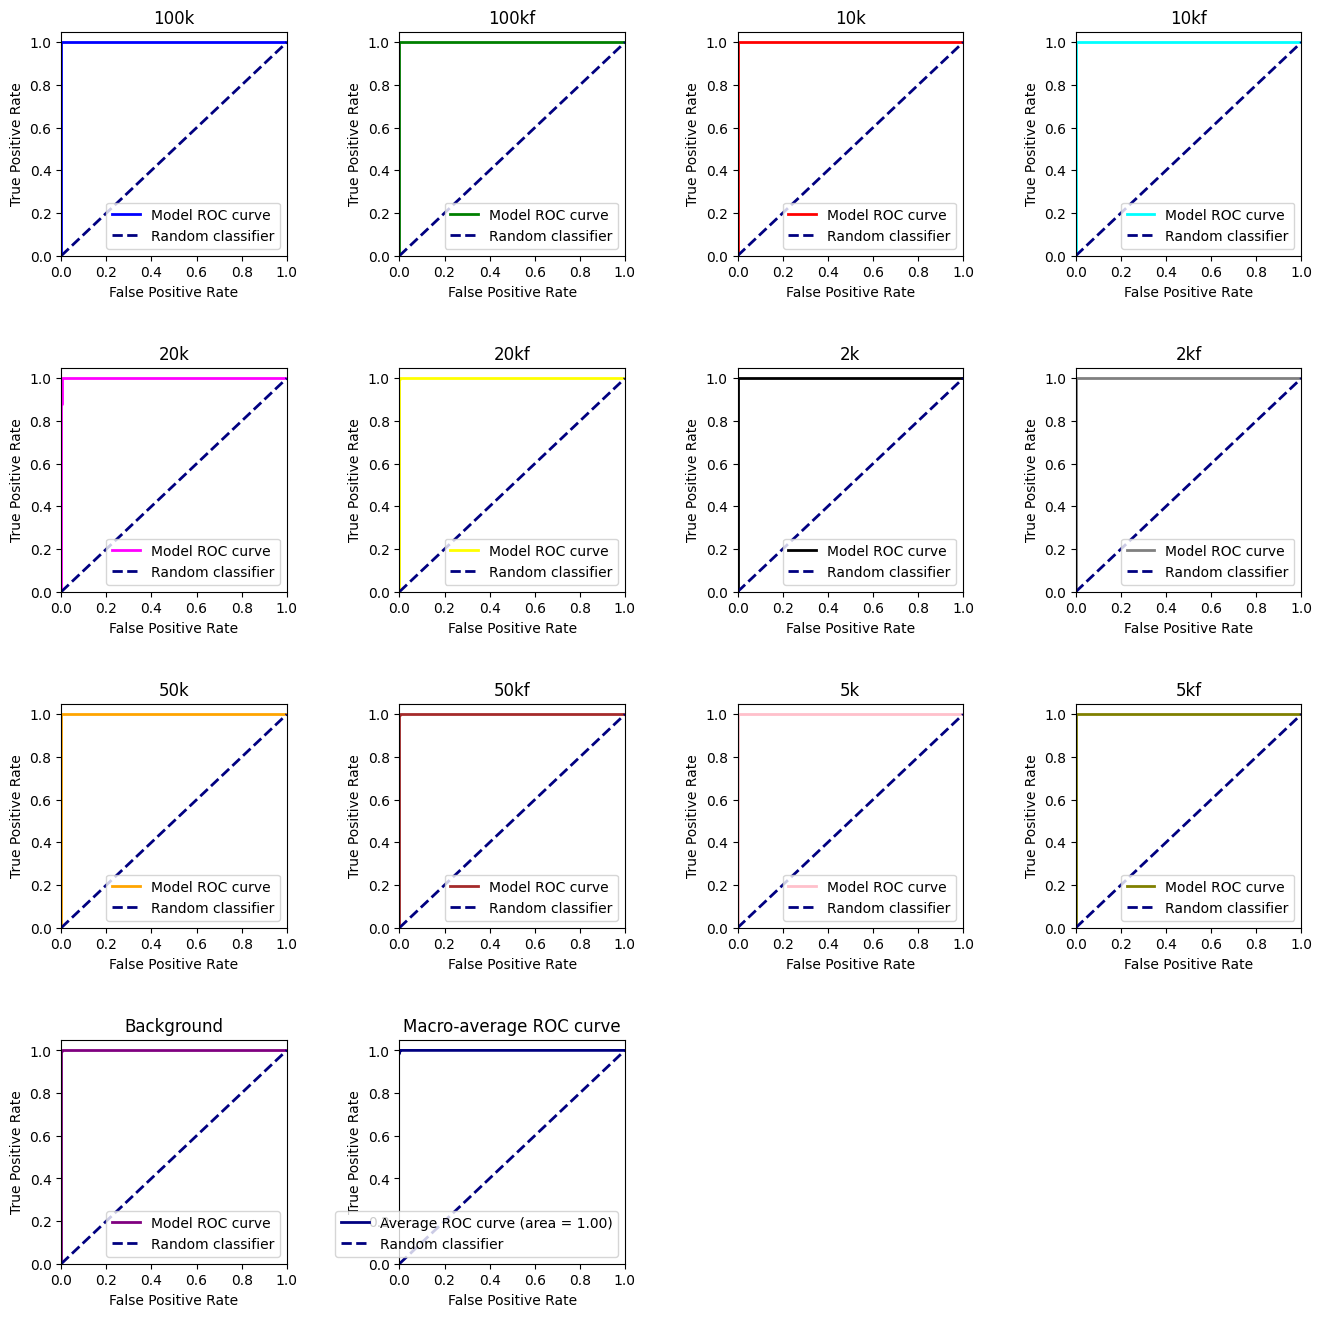

In [6]:
cf.precision_recall_metrics(model, test_ds, class_names)